# Задание 1. Расчет ключевых метрик

Таблица: raw_data
Столбцы:
- `product_id` — идентификатор товара;
- `quantity` — количество;
- `purchase_date` — дата действия;
- `user_id` — id клиента;
- `is_trial_period` — платность

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
raw_data = pd.read_excel('C:\\Users\T\Documents\Тестовое KIVOK/test_case_data_analyst.xlsx')
raw_data.head(3)

,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991


In [3]:
def total_info(df, name_list):
    print('Название колонок таблицы', name_list)
    print()
    display(df.columns) # название колонок
    print('___________________________________________')
    print('Cтруктура таблицы', name_list)
    print('___________________________________________')
    display(df.head())# структуру таблицы
    print('___________________________________________')
    print('Общая информация Info таблицы', name_list)
    print('___________________________________________')
    display(df.info())# состав таблицы, формат столбцов, наличие пустых строк
    print('___________________________________________')
    print('Общая информация describe таблицы', name_list)
    print('___________________________________________')
    display(df.describe())# используются для просмотра некоторых основных статистических данных, 
    # таких как процентиль, среднее значение, стандартное отклонение и т. Д.
    print('___________________________________________')
    print('Hаличие нулевых обьектов в таблице', name_list)
    print('___________________________________________')
    display(df.isnull().sum()) # наличие нулевых обьектов
    print('___________________________________________')
    print('Наличие пропусков в таблице' , name_list)
    print('___________________________________________')
    display(df.isna().sum())# наличие пропусков
    print('___________________________________________')
    print('Hаличие грубых дубликатов в таблице' , name_list)
    print('___________________________________________')
    display(df.duplicated().sum()) # наличие дубликатов

In [4]:
total_info(raw_data, 'Оформление подписок')

Название колонок таблицы Оформление подписок



Index(['product_id', 'quantity', 'is_trial_period', 'purchase_date',
       'user_id'],
      dtype='object')

___________________________________________
Cтруктура таблицы Оформление подписок
___________________________________________


,product_id,quantity,is_trial_period,purchase_date,user_id
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657


___________________________________________
Общая информация Info таблицы Оформление подписок
___________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114200 entries, 0 to 114199
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   product_id       114200 non-null  object        
 1   quantity         114200 non-null  int64         
 2   is_trial_period  114200 non-null  bool          
 3   purchase_date    114200 non-null  datetime64[ns]
 4   user_id          114200 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(1)
memory usage: 3.6+ MB


None

___________________________________________
Общая информация describe таблицы Оформление подписок
___________________________________________


,quantity,user_id
count,114200.0,1.142000e+05
mean,1.0,8.507495e+06
std,0.0,1.326292e+06
min,1.0,4.040000e+02
25%,1.0,8.378475e+06
50%,1.0,8.725616e+06
75%,1.0,9.121512e+06
max,1.0,9.694775e+06


___________________________________________
Hаличие нулевых обьектов в таблице Оформление подписок
___________________________________________


product_id         0
quantity           0
is_trial_period    0
purchase_date      0
user_id            0
dtype: int64

___________________________________________
Наличие пропусков в таблице Оформление подписок
___________________________________________


product_id         0
quantity           0
is_trial_period    0
purchase_date      0
user_id            0
dtype: int64

___________________________________________
Hаличие грубых дубликатов в таблице Оформление подписок
___________________________________________


84

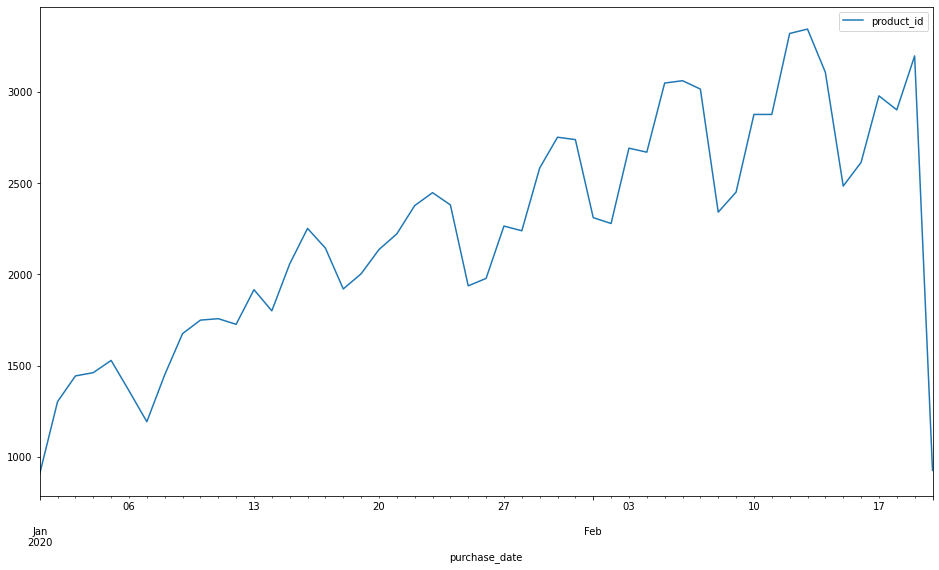

In [5]:
raw_data.pivot_table(index=['purchase_date'], values = 'product_id', 
                      aggfunc = 'count').plot(figsize=(16,9))
plt.show()

In [6]:
#def _hist(i):
#    df_free = raw_data[raw_data['is_trial_period'] == False]
#    df_paid = raw_data[raw_data['is_trial_period'] == True]
#    plt.figure(figsize = (9, 3.5))
#    sns.distplot(df_free[i])
#    sns.distplot(df_paid[i])
#    plt.legend(labels=['Пробная подписка', 'Платная подписка'], fontsize = 12)
#    plt.title(i, fontsize=12);

In [7]:
#list_columns = ['purchase_date','user_id','revenue']
#display(list_columns[:-1])

#for i in list_columns[0:13]:
#    _hist(i)

Первые выводы: тип данных в таблице корректен, количесвто подписок макс = 1, пропусков нет, нулевых знанений нет, грубых дубликатов - 84. На начало и конец периода покупок мало, последняя неделя - неполная.

# Расчет retention rate

In [8]:
products = raw_data

In [9]:
def revenued(is_trial_period):
    if is_trial_period == True:
        return 4.99
    else:
        return 0

products['revenue'] = products.apply(lambda x: revenued(x['is_trial_period']), axis = 1)

products['order_week'] = products['purchase_date'].astype('datetime64[W]')
products.head(5)

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue,order_week
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222,0.0,2020-02-13
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402,0.0,2020-02-13
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991,0.0,2020-02-13
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582,0.0,2020-02-13
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657,0.0,2020-02-13


In [10]:
#построим таблицу по первым заказам
first_order = products.groupby('user_id')['purchase_date'].min().reset_index()

#first_orders['first_visit_month'] = first_orders['first_visit_dt'].astype('datetime64[M]')
first_order['first_order_week'] = first_order['purchase_date'].astype('datetime64[W]')
first_order=first_order.rename(columns={'purchase_date':'min_order_date'})

first_order.head()

,user_id,min_order_date,first_order_week
0,404,2020-02-03,2020-01-30
1,5337,2020-02-17,2020-02-13
2,9010,2020-01-27,2020-01-23
3,19880,2020-01-30,2020-01-30
4,23403,2020-01-20,2020-01-16


In [11]:
#составим таблицу из двух предыдущих
subscriptions =pd.merge(products,first_order, on='user_id')

#добавим столбец с разницами между месяцем первой сессии и иной, под названием длительность жизни когорты
subscriptions['cohort_lifetime'] = subscriptions['order_week'] - subscriptions['first_order_week']
subscriptions['cohort_lifetime'] = subscriptions['cohort_lifetime'] / np.timedelta64(1,'W')
#subscriptions['cohort_lifetime'] = subscriptions['cohort_lifetime'].round().astype('int')

subscriptions.head()

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue,order_week,min_order_date,first_order_week,cohort_lifetime
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222,0.00,2020-02-13,2020-02-12,2020-02-06,1.0
1,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-12,9484222,4.99,2020-02-06,2020-02-12,2020-02-06,0.0
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402,0.00,2020-02-13,2020-02-10,2020-02-06,1.0
3,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-10,9422402,4.99,2020-02-06,2020-02-10,2020-02-06,0.0
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991,0.00,2020-02-13,2020-02-11,2020-02-06,1.0


,first_order_week,cohort_lifetime,user_id,cohort_users,retention
0,2019-12-26,0.0,906,906,1.000000
1,2019-12-26,1.0,319,906,0.352097
2,2019-12-26,2.0,281,906,0.310155
3,2019-12-26,3.0,251,906,0.277042
4,2019-12-26,4.0,220,906,0.242826
5,2019-12-26,5.0,218,906,0.240618
6,2019-12-26,6.0,192,906,0.211921
7,2019-12-26,7.0,182,906,0.200883
8,2019-12-26,8.0,4,906,0.004415
9,2020-01-02,0.0,9398,9398,1.000000


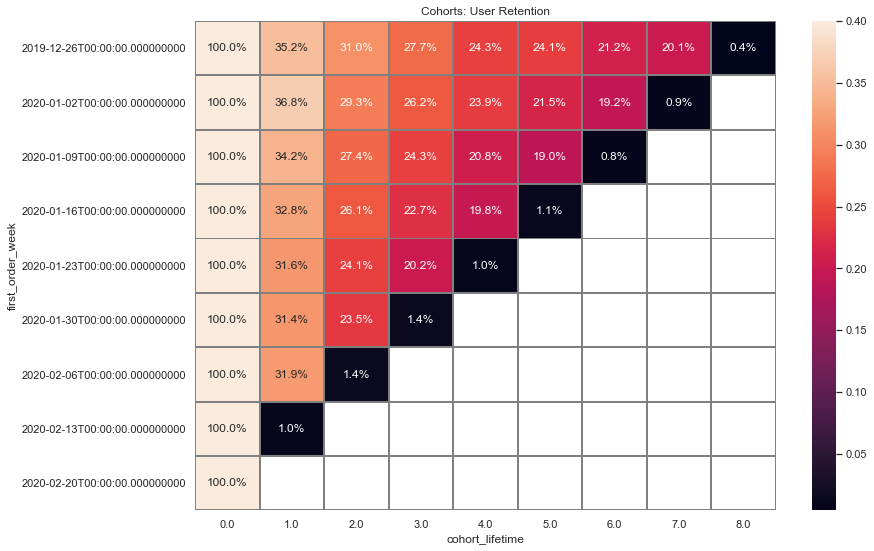

In [12]:
#составим тепловую карту по матрице "удержания клиентов"
#retention_pivot таблица с процентом удержанием 
#cohort_lifetime - количество недель пользования продуктом
cohorts = subscriptions.groupby(['first_order_week','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime']== 0][['first_order_week','user_id']]
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_order_week')
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_order_week',columns='cohort_lifetime',values='retention',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', vmax=0.4,linewidths=1, linecolor='gray')
cohorts

Краткий вывод: по последней неделе у нас мало данных, поэтому показатели черных ячеек не представляют достоверный результат. Клиенты, подключившиеся на первой неделе показывают наилучший результат удержания, за 7 недель из скачивания пробной версии приложения в покупку платного приложения перешли около 20% пользователей. В прочих когортах такой результат достигается только на 3,4 или 5 неделю. Процент перехода из пробной версии в платную составляет от 31.4% до 36.8%

In [13]:
import os
from openpyxl import load_workbook


def append_df_to_excel(filename, df, sheet_name='Sheet1', startrow=None,
                       truncate_sheet=False, 
                       **to_excel_kwargs):
    """
Эта функция сохраняет датафрейм в эксель, 

файл будет помещен в папку по предложенному пути
    """
    # Excel file doesn't exist - saving and exiting
    if not os.path.isfile(filename):
        df.to_excel(
            filename,
            sheet_name=sheet_name, 
            startrow=startrow if startrow is not None else 0, 
            **to_excel_kwargs)
        return
    
    # ignore [engine] parameter if it was passed
    if 'engine' in to_excel_kwargs:
        to_excel_kwargs.pop('engine')

    writer = pd.ExcelWriter(filename, engine='openpyxl', mode='a')

    # try to open an existing workbook
    writer.book = load_workbook(filename)
    
    # get the last row in the existing Excel sheet
    # if it was not specified explicitly
    if startrow is None and sheet_name in writer.book.sheetnames:
        startrow = writer.book[sheet_name].max_row

    # truncate sheet
    if truncate_sheet and sheet_name in writer.book.sheetnames:
        # index of [sheet_name] sheet
        idx = writer.book.sheetnames.index(sheet_name)
        # remove [sheet_name]
        writer.book.remove(writer.book.worksheets[idx])
        # create an empty sheet [sheet_name] using old index
        writer.book.create_sheet(sheet_name, idx)
    
    # copy existing sheets
    writer.sheets = {ws.title:ws for ws in writer.book.worksheets}

    if startrow is None:
        startrow = 0

    # write out the new sheet
    df.to_excel(writer, sheet_name, startrow=startrow, **to_excel_kwargs)

    # save the workbook
    writer.save()

# Расчет LTV

In [14]:
#построим таблицу по покупкам
orders = products#[products['is_trial_period']== False]

orders['order_week'] = orders['purchase_date'].astype('datetime64[W]') 
orders.head()

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue,order_week
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222,0.0,2020-02-13
1,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402,0.0,2020-02-13
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991,0.0,2020-02-13
3,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,9455582,0.0,2020-02-13
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-16,8803657,0.0,2020-02-13


In [15]:
#построим таблицу по первым заказам
first_order = orders.groupby('user_id')['purchase_date'].min().reset_index()

#first_orders['first_visit_month'] = first_orders['first_visit_dt'].astype('datetime64[M]')
first_order['first_order_week'] = first_order['purchase_date'].astype('datetime64[W]')
first_order=first_order.rename(columns={'purchase_date':'min_order_date'})

first_order.head()

,user_id,min_order_date,first_order_week
0,404,2020-02-03,2020-01-30
1,5337,2020-02-17,2020-02-13
2,9010,2020-01-27,2020-01-23
3,19880,2020-01-30,2020-01-30
4,23403,2020-01-20,2020-01-16


In [16]:
#полная таблица по покупкам
orders_full = pd.merge(orders,first_order, on='user_id')
orders_full.head()

,product_id,quantity,is_trial_period,purchase_date,user_id,revenue,order_week,min_order_date,first_order_week
0,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-19,9484222,0.00,2020-02-13,2020-02-12,2020-02-06
1,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-12,9484222,4.99,2020-02-06,2020-02-12,2020-02-06
2,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-17,9422402,0.00,2020-02-13,2020-02-10,2020-02-06
3,1week_4.99_USD_subscription_7days_trial,1,True,2020-02-10,9422402,4.99,2020-02-06,2020-02-10,2020-02-06
4,1week_4.99_USD_subscription_7days_trial,1,False,2020-02-18,4997991,0.00,2020-02-13,2020-02-11,2020-02-06


In [17]:
#cohort_sizes
#посчитаем количество новых покупателей за каждую неделю
cohort_sizes = (
    first_order.groupby('first_order_week')
    .agg({'user_id': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order_week', 'n_buyers']
cohort_sizes

,first_order_week,n_buyers
0,2019-12-26,906
1,2020-01-02,9398
2,2020-01-09,8927
3,2020-01-16,8983
4,2020-01-23,7732
5,2020-01-30,9048
6,2020-02-06,9101
7,2020-02-13,8559
8,2020-02-20,255


In [18]:
#cгруппируем таблицу заказов по неделе первой покупки и неделе каждого заказа и посчитаем количество операций
cohorts = (
    orders_full.groupby(['first_order_week', 'order_week'])
    .agg({'product_id': 'count'})
    .reset_index()
)
cohorts.columns = ['first_order_week','order_week','product_id']

In [19]:
#
report = pd.merge(cohort_sizes, cohorts, on='first_order_week')
#report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_week'] - report['first_order_week']) / np.timedelta64(1, 'W')
report['age'] = report['age'].round().astype('int')
report['ltv'] = (report['product_id']/ report['n_buyers'])*4.99

def nofree(age,ltv):
    if age == 0:
        return ltv-4.99
    else:
        return ltv
report['ltv_wotrials'] = report.apply(lambda x: nofree(x['age'], x['ltv']), axis = 1)
report['romi'] = report['ltv_wotrials']/6

<AxesSubplot:title={'center':'LTV'}, xlabel='age', ylabel='first_order_week'>

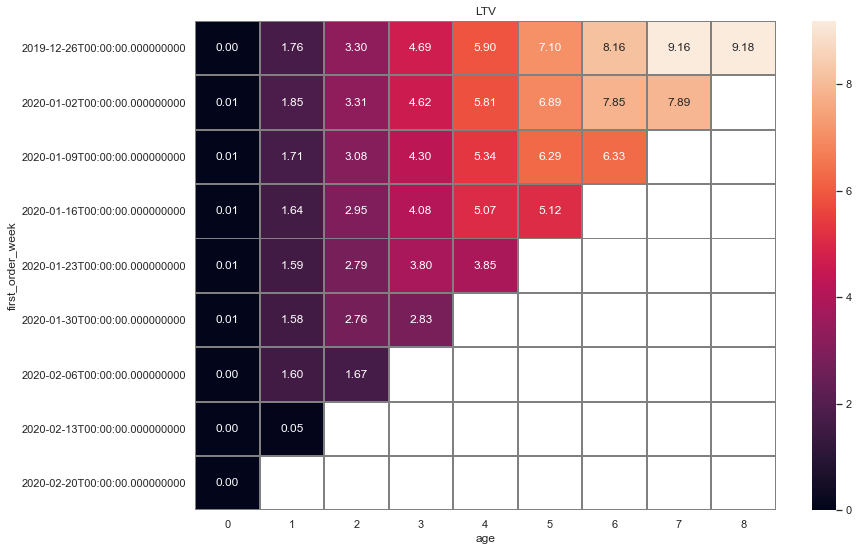

In [20]:
result = report.pivot_table(
    index='first_order_week', 
    columns='age', 
    values='ltv_wotrials', 
    aggfunc='mean'
).round(3).cumsum(axis=1)

#а теперь красиво
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(result, annot=True,linewidths=1, linecolor='gray',fmt='.2f')

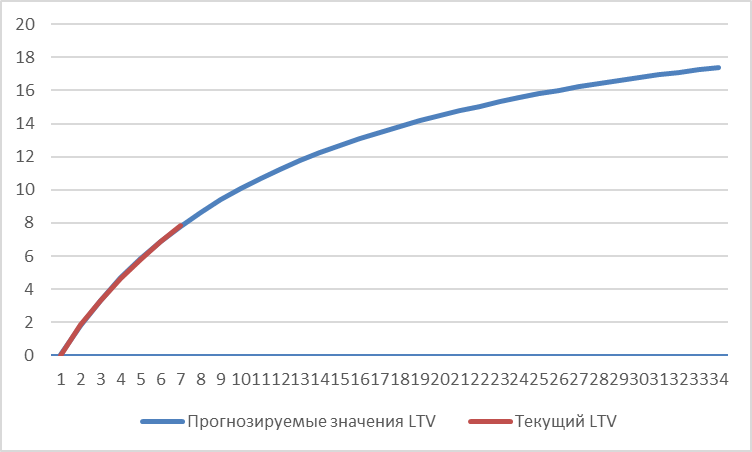

На пятую неделю LTV больше 4.99

<AxesSubplot:title={'center':'ROMI'}, xlabel='age', ylabel='first_order_week'>

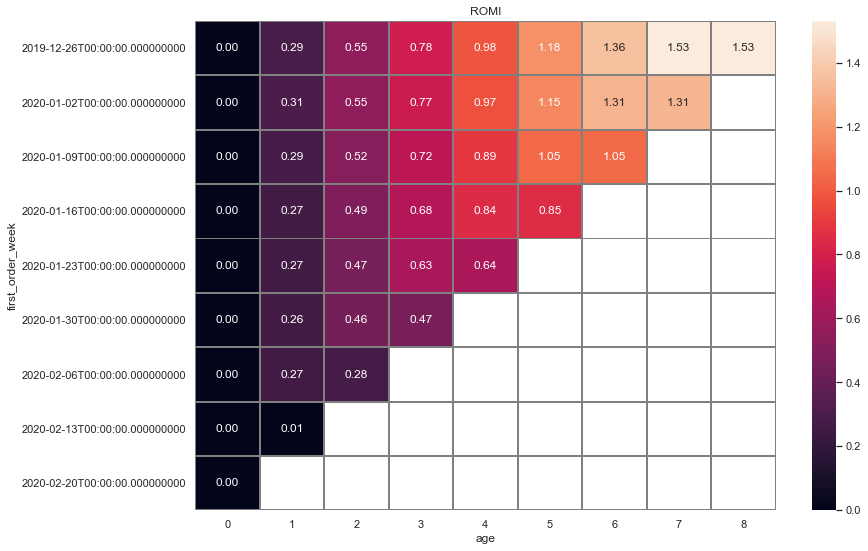

In [21]:
result = report.pivot_table(
    index='first_order_week', 
    columns='age', 
    values='romi', 
    aggfunc='mean'
).round(3).cumsum(axis=1)
#а теперь красиво
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(result, annot=True,linewidths=1, linecolor='gray',fmt='.2f')

In [22]:
#append_df_to_excel('C:\\Users\T\Documents\Тестовое KIVOK/для прогноза.xlsx', report, sheet_name='ROMI and LTV', index=False)

Результаты прогноза ROMI для 2 когорты:
- ссылка на решение:
https://docs.google.com/spreadsheets/d/1lvCwu667SEpJQ3SwHi9kug5gwt12njgv/edit?usp=sharing&ouid=109161356889577100177&rtpof=true&sd=true


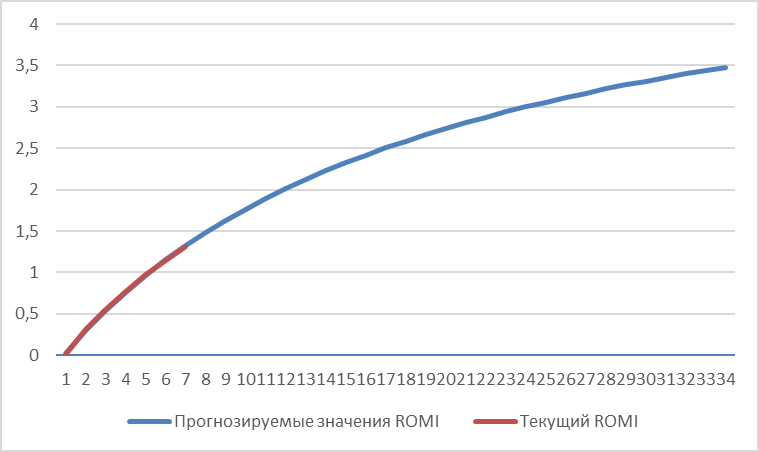

Краткий вывод: для второй когорты инвестиции не окупились на 4 неделе, но окупились на 5. Через полгода (34 недели) есть вероятность того, что инвестиции на продолжающих использовать приложение окупятся втрое.

# Задание 2

ссылка на SQL запросы с заданием: https://docs.google.com/document/d/1TV_0KTrW0h-oPZGvPRN_oDCXIqOFMVOqzhneZSYcczk/edit?usp=sharing

# Задание 3

Продуктовый менеджер сформировал гипотезу, что новая версия экрана продаж будет
лучше перформить по сравнению со старой, в связи с тем, что на новом экране продаж
более понятно описаны преимущества платной версии приложения.
Продуктовый менеджер ожидает увеличение уровня конверсии из установки в покупку
платной версии приложения. Приложение тем временем уже очень активно
продвигается на рынке, каждый день привлекается в среднем по 30 000 новых
пользователей, текущий уровень конверсии из установки в покупку 5%.
Как бы вы предложили проверить данную гипотезу, какие инструменты и тесты бы
использовали в процессе проверки?

Вводные:

A: старая группа, со старым описанием

B: новая группа, более понятное описание

новые пользователи = 30000 в день

текущий уровень конверсии = 5%

Нулевая гипотеза в следующем: нет статистически значимой разницы между конверсиями совершаемого события в обеих группах.

Альтернативная гипотеза в следующем: между конверсиями совершаемого события в обеих группах есть статистически значимая разница.

- В каждой из групп подсчитать количество уникальных пользователей (на экране продаж)
- В каждой из групп подсчитать количество уникальных пользователей, совершающих событие (покупка)
- Данные должны иметь нормальное распредление (можно провести тест Колмогорова-Смирнова)
- Провести Z тест:

1. Посчитать пропорцию успехов в 1 и 2 группе (под успехом понимать долю пользователей купивших продукт от общей доли пользователей) и разницу между успехами
2. Посчитать общий успех по 2 группам (успех+успех/уник польз + уник польз)
3. Посчитать статистику в ст.отклонениях стандартного нормального распределения
4. Посчитать p_value, если p_value меньше уровня критической статистической значимости(5%), нулевая гипотеза отвергается, если больше приходим к выводу, что у нас нет оснований считать конверсию разной